<span style="color:blue; font-size:40px; "> Task - 5 To explore Business Analytics </span>

<span style="color:red; font-size:20px; "> Perform ‘Exploratory Data Analysis’ on the provided dataset SampleSuperstore <span style="color:red; font-size:20px; ">

You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data? You can choose any of the tool of your choice

In [91]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [92]:
data  = pd.read_csv('sample.csv')
data.columns   = [i.lower() for i in data.columns]
print("Number of rows : ",data.shape[0])
print("Number of cols : ",data.shape[1])

Number of rows :  9994
Number of cols :  13


In [93]:
# First 5 rows
data.head()

,ship mode,segment,country,city,state,postal code,region,category,sub-category,sales,quantity,discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [94]:
catgorical_data = data.select_dtypes(exclude = "number")
print("catgorical columns of dataset : ")
catgorical_data.columns

catgorical columns of dataset : 


Index(['ship mode', 'segment', 'country', 'city', 'state', 'region',
       'category', 'sub-category'],
      dtype='object')

In [95]:
numerical_data = data.select_dtypes(include = "number")
print("numerical columns of dataset : ")
numerical_data.columns

numerical columns of dataset : 


Index(['postal code', 'sales', 'quantity', 'discount', 'profit'], dtype='object')

# Exploratory data analysis 

In [96]:
# Check for missing values in columns 
print("No missing values !!!! ")
data.isnull().sum()

No missing values !!!! 


ship mode       0
segment         0
country         0
city            0
state           0
postal code     0
region          0
category        0
sub-category    0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

In [97]:
# let me drop unwanted columns from the dataset . 
data["country"].value_counts()

United States    9994
Name: country, dtype: int64

In [98]:
data.drop(["country"],axis = 1, inplace = True)

In [99]:
# let me drop postalcode as well 
data.drop(["postal code"],axis = 1, inplace = True)

In [100]:
data.head()

,ship mode,segment,city,state,region,category,sub-category,sales,quantity,discount,profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## 1 . Which Ship Mode is Preferred by most of the customer . 

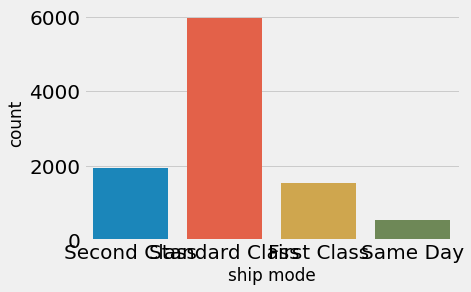

In [101]:
sns.countplot(data["ship mode"])
plt.show()

## 2. Different types of Segments .

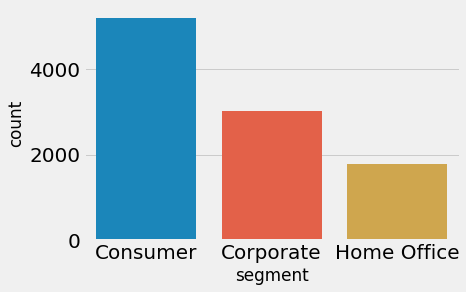

In [102]:
sns.countplot(data["segment"])
plt.show()

## 3 . Different Product of Categories  .


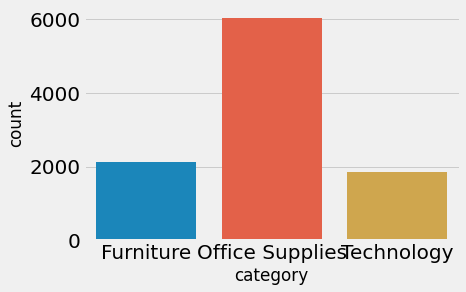

In [103]:
sns.countplot(data["category"])
plt.show()

## 4 . Region wise Profit and Sales   .

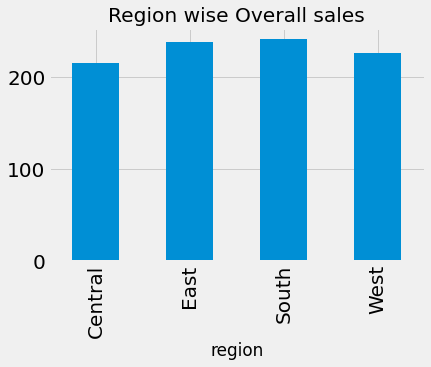

In [104]:
data.groupby(['region'])["sales"].mean().plot(kind  = 'bar').set_title('Region wise Overall sales')
plt.show()

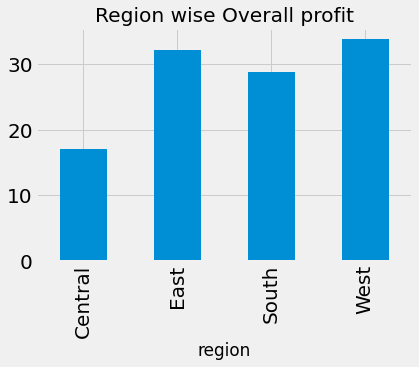

In [105]:
data.groupby(['region'])["profit"].mean().plot(kind  = 'bar').set_title('Region wise Overall profit')
plt.show()

## 4 . Category wise Profit and Sales   .

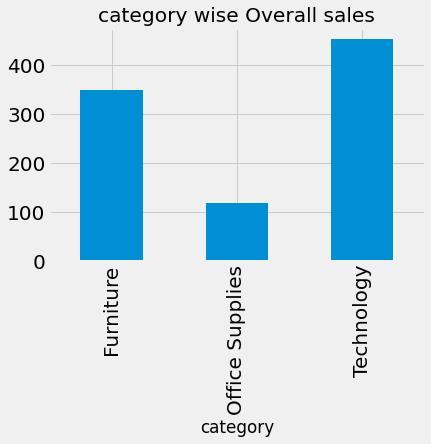

In [106]:
data.groupby(['category'])["sales"].mean().plot(kind  = 'bar').set_title('category wise Overall sales')
plt.show()

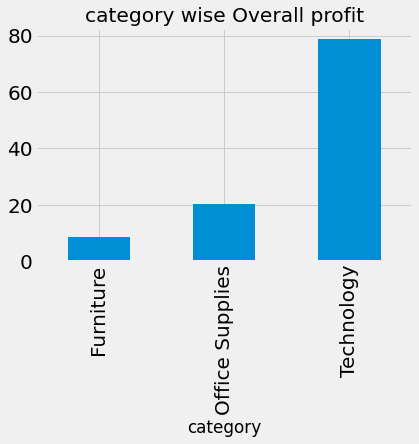

In [107]:
data.groupby(['category'])["profit"].mean().plot(kind  = 'bar').set_title('category wise Overall profit')
plt.show()

## 4 . Sub Category wise Profit and Sales   .

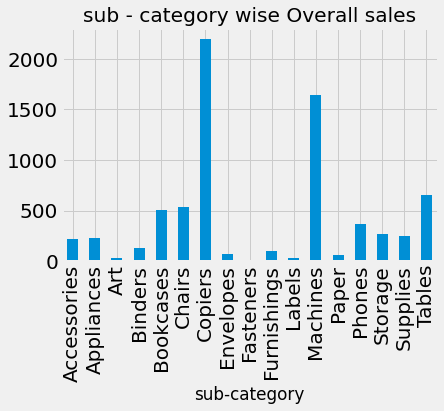

In [108]:
data.groupby(['sub-category'])["sales"].mean().plot(kind  = 'bar').set_title('sub - category wise Overall sales')
plt.show()

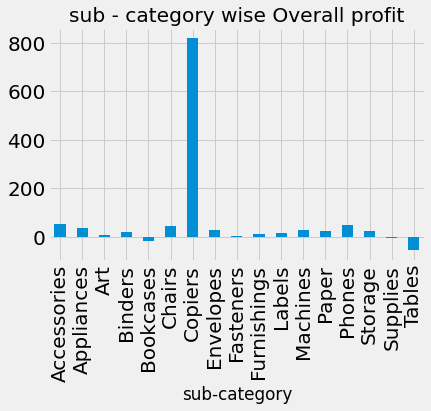

In [109]:
data.groupby(['sub-category'])["profit"].mean().plot(kind  = 'bar').set_title('sub - category wise Overall profit')
plt.show()

# Top 10  Cities which are Involving in Business .  

In [110]:
list(data["city"].value_counts().head(10).index)

['New York City',
 'Los Angeles',
 'Philadelphia',
 'San Francisco',
 'Seattle',
 'Houston',
 'Chicago',
 'Columbus',
 'San Diego',
 'Springfield']

# Quantity  of each SubCategories sold .

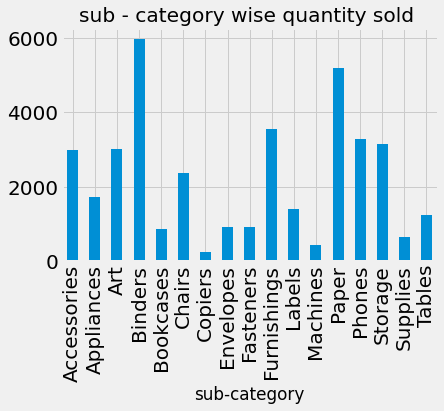

In [111]:
data.groupby(['sub-category'])["quantity"].sum().plot(kind  = 'bar').set_title('sub - category wise quantity sold ')
plt.show()

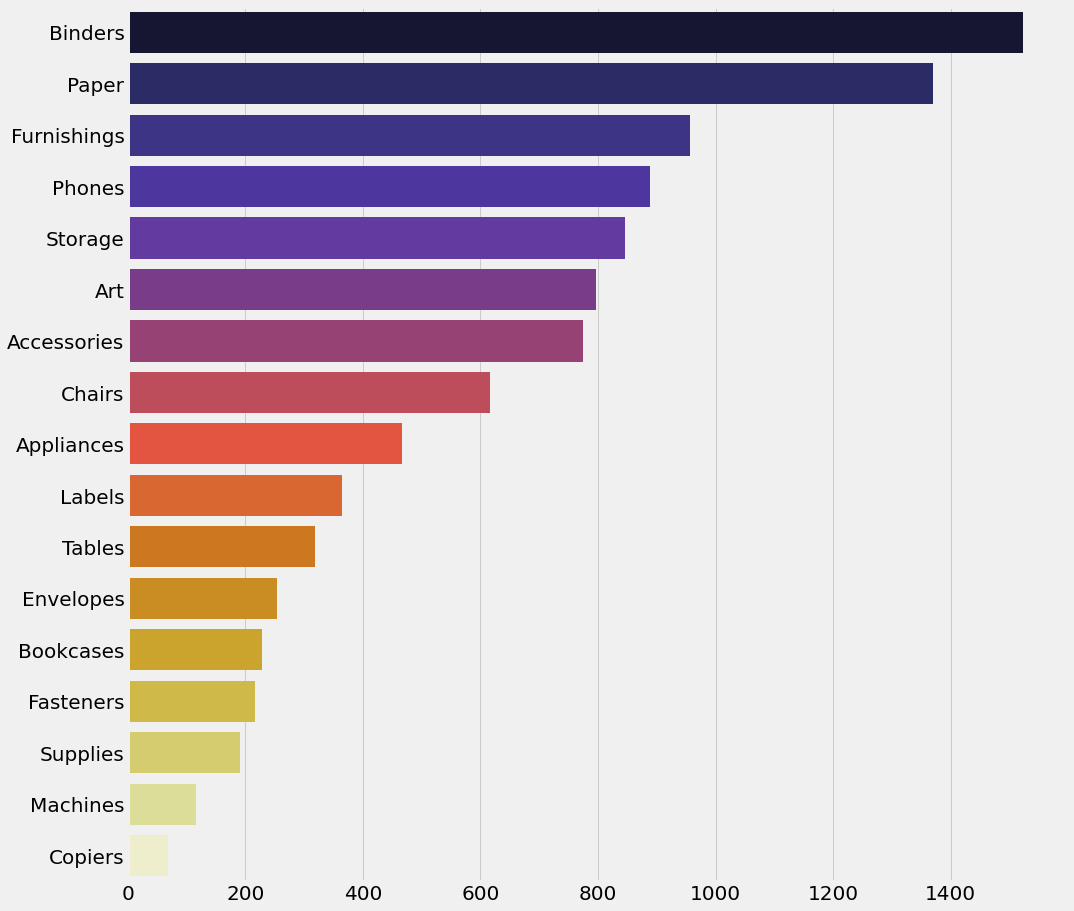

In [112]:
plt.rcParams["figure.figsize"] = (15,15)
sns.barplot(y = data["sub-category"].value_counts().index ,x = data["sub-category"].value_counts().values,orient = "h",palette = 'CMRmap')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.show()

# Thank  You 

## Vinod R